In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_validate

# from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

# Load data

In [3]:
df_raw = pd.read_csv('../data/doordash/historical_data.csv')

In [4]:
df_raw.shape

(197428, 16)

In [34]:
# market_id, store_id, order_protocol should be category
df_raw.describe(include='all')

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428,197421,197428.000000,192668,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
unique,NaN,180985,178110,NaN,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-02-11 19:50:43,2015-02-05 03:10:31,NaN,american,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,5,NaN,19399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.978706,NaN,NaN,3530.510272,NaN,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,NaN,NaN,2053.496711,NaN,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,NaN,NaN,1686.000000,NaN,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,NaN,NaN,3592.000000,NaN,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,NaN,NaN,5299.000000,NaN,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000


In [11]:
df_raw.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [5]:
df_raw.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [6]:
df_raw.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

# Preprocessing

In [32]:
num_features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
                'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
                'total_outstanding_orders', 'estimated_order_place_duration',
                'estimated_store_to_consumer_driving_duration']
cat_features = ['market_id', 'store_primary_category', 'order_protocol'] # 'store_id',
target_col = 'delivery_duration'

In [57]:
# create target variable = total delivery duration seconds: actual_delivery_time-created_at
df_base = df_raw.copy()
df_base['created_at_ts'] = pd.to_datetime(df_base['created_at'])
df_base['actual_delivery_ts'] = pd.to_datetime(df_base['actual_delivery_time'])
df_base['delivery_duration'] = (df_base['actual_delivery_ts'] - df_base['created_at_ts']).apply(lambda x: x.total_seconds())


In [58]:
# market_id, store_id, order_protocol should be category
df_base[['market_id', 'order_protocol', 'store_primary_category']] = df_base[['market_id', 'order_protocol', 'store_primary_category']].astype('str')

In [59]:
# drop rows with missing target variable
print(df_base.shape)
df_base.dropna(subset=[target_col], inplace=True)
print(df_base.shape)

(197428, 19)
(197421, 19)


# EDA

In [38]:
df_base.describe(include='all', datetime_is_numeric=True)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,created_at_ts,actual_delivery_ts,delivery_duration
count,196441.0,197428,197421,197428.0,192668,196433.0,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,197428,197421,1.974210e+05
unique,6.0,180985,178110,6743.0,74,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2.0,2015-02-11 19:50:43,2015-02-05 03:10:31,6865.0,american,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,55058.0,6,5,937.0,19399,54725.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,2.908257e+03
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,1.010000e+02
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2015-01-29 02:32:42,2015-01-29 03:22:29,2.104000e+03
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,2.660000e+03
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,3.381000e+03
max,NaN,NaN,NaN,NaN,NaN,NaN,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,8.516859e+06


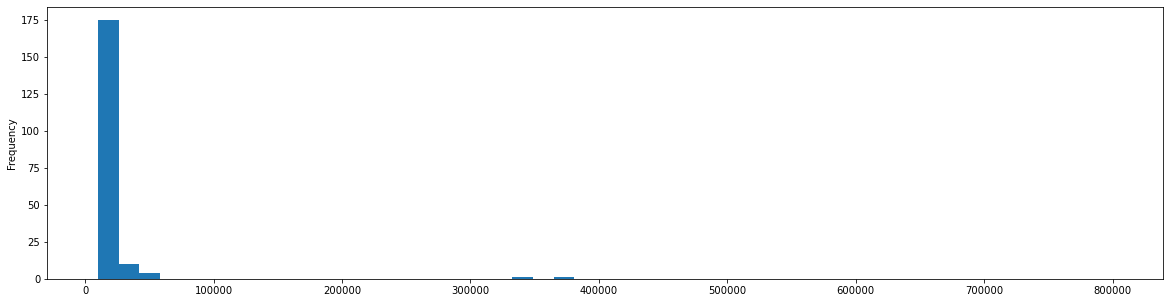

In [81]:
# target distribution
# sns.histplot(df_base.sample(frac=0.1), x=target_col);
plt.figure(figsize=(20, 5))
df_base[target_col].plot(kind='hist', bins=np.linspace(10000, 800000));

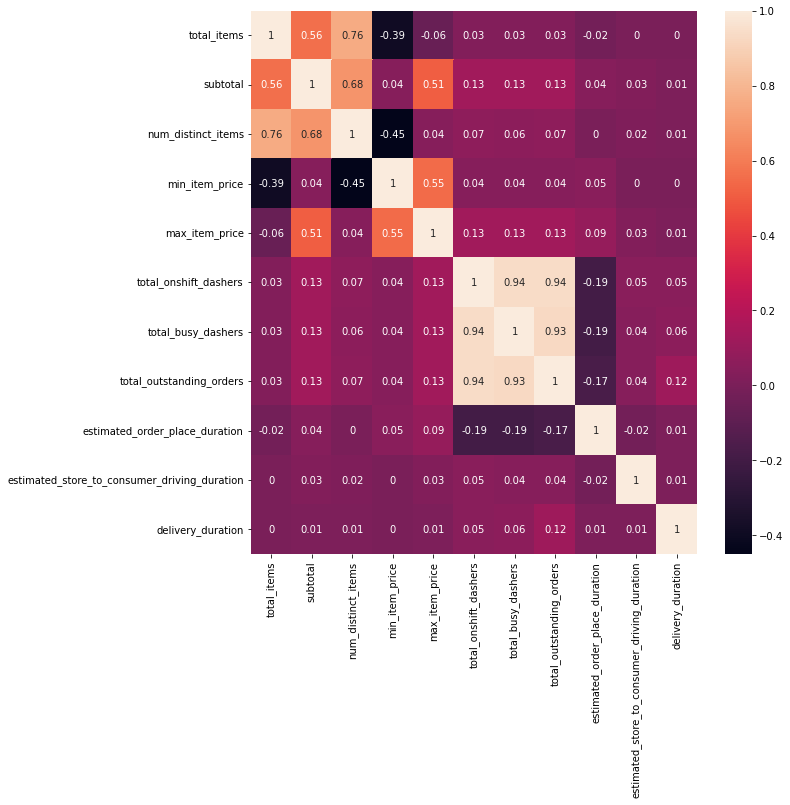

In [89]:
# numeric features
correlation_matrix = df_base[num_features + [target_col]].corr().round(2)
plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True); # annot = True to print the values inside the square

In [120]:
# plt.figure(figsize=(20, 20))
# sns.pairplot(df_base, hue=target_col, vars=num_features);

KeyboardInterrupt: 

<Figure size 1440x1440 with 0 Axes>

: 

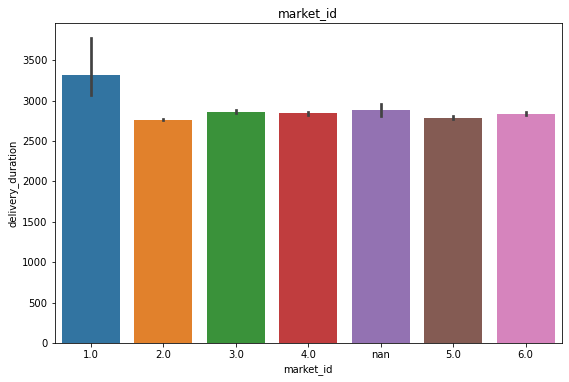

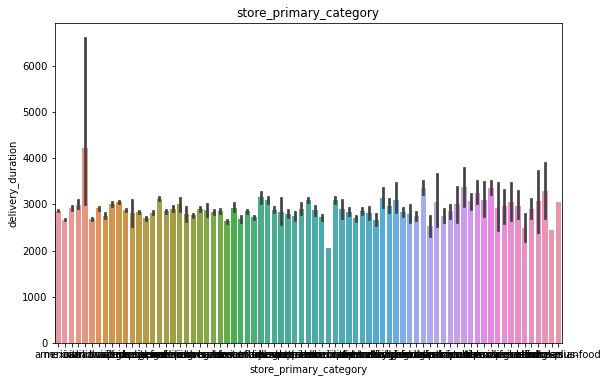

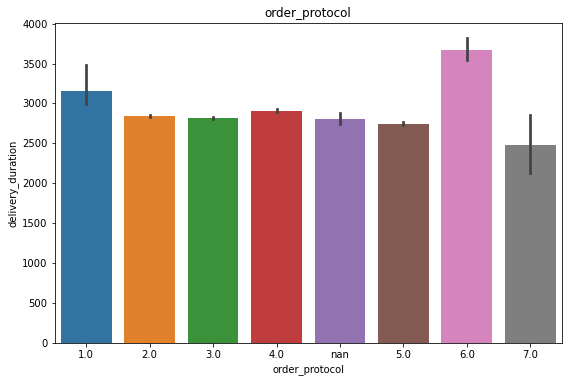

In [124]:
# categorical features
for i, feat in enumerate(cat_features):
    plt.figure(figsize=(20, 20))
    ax = plt.subplot(3, 2, i+1)
    sns.barplot(x=feat, y=target_col, data=df_base, estimator=np.mean).set(title=feat);


# Prepare features

In [60]:
random_state=969

In [61]:
X = df_base[num_features + cat_features].copy()
y = df_base[target_col].copy()

In [62]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(157936, 13) (157936,) (39485, 13) (39485,)


# Train model pipeline

In [101]:
# fill missing values
impute_median = SimpleImputer(strategy='median')
impute_missing = SimpleImputer(strategy='constant', fill_value='missing')

num_transforms = Pipeline([
    ('impute_median', impute_median),
    ('std_scaler', StandardScaler())
])

cat_transforms = Pipeline([
    ('impute_missing', impute_missing),
    ('ohe', OneHotEncoder(handle_unknown ='ignore'))
])

preprocessor = ColumnTransformer([
    ('num_features', num_transforms, num_features),
    ('cat_features', cat_transforms, cat_features)
])

In [105]:
# instantiate regressor
rf = RandomForestRegressor(random_state=random_state, n_jobs=-1)

# build pipeline
pipe = Pipeline([
    ('prep', preprocessor),
    ('model', rf)
])


In [127]:
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

rf_mse = mean_squared_error(y_test, preds, squared=False)
rf_rmse = np.sqrt(rf_mse)
print(rf_rmse)

4920.698062049076


### Cross validaton

In [107]:
%%time
kfold = KFold(n_splits=3, shuffle=True, random_state = random_state)

# Fit pipeline
metrics = cross_validate(pipe, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error', return_estimator=True)

Wall time: 1h 38min 7s


In [108]:
print(metrics['test_score'])
print(f"rmse: {np.sqrt(-metrics['test_score'])}")
print(np.sqrt(-metrics['test_score']).mean())

[-5.40563542e+08 -4.68786351e+08 -1.37831466e+09]
rmse: [23250.02240829 21651.47457602 37125.66042847]
27342.38580426203


In [115]:
preds = metrics['estimator'][0].predict(X_test)

rf_mse = mean_squared_error(y_test, preds)
rf_rmse = np.sqrt(rf_mse)
print(rf_rmse)

13920.413047603537


In [116]:
13920/60

232.0

In [122]:
df_test_result = pd.DataFrame(data = {"y_true": y_test.values, 'y_pred': preds})

In [123]:
df_test_result.head()

,y_true,y_pred
0,2715.0,3758.83
1,3226.0,258966.37
2,4301.0,3506.50
3,1595.0,2742.71
4,3099.0,2569.42


### Randomsearch with Cross Validation